In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
base_dir = "/cluster/work/bewi/members/rquiles/zeroshot_amr/experiments/results"
fps = ["MACCS", "morgan_1024", "morgan_512"]
files = [f"{base_dir}/{fp}/metrics.csv" for fp in fps]
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
print(df.columns)

Index(['Fingerprint', 'Embedding', 'Set', 'Balanced_Accuracy', 'MCC'], dtype='object')


In [8]:
df["Embedding"].unique()

array(['hvgs_1000', 'pcs_10', 'pcs_25', 'pcs_50', 'piscvi', 'fcr',
       'hvgs_3000', 'hvgs_5000'], dtype=object)

In [3]:
df["Set"].unique()

array(['Random Split', 'Cell line Zeroshot', 'Drug Zeroshot',
       'Cell line Drug Zeroshot'], dtype=object)

In [4]:
df[(df["Fingerprint"] == "morgan_512") & (df["Set"] == "Random Split")]

,Fingerprint,Embedding,Set,Balanced_Accuracy,MCC
56,morgan_512,hvgs_1000,Random Split,0.908745,0.769958
60,morgan_512,hvgs_3000,Random Split,0.906526,0.769118
64,morgan_512,hvgs_5000,Random Split,0.904716,0.764489
68,morgan_512,pcs_10,Random Split,0.905397,0.768688
72,morgan_512,pcs_25,Random Split,0.905391,0.768661
76,morgan_512,pcs_50,Random Split,0.907891,0.770857
80,morgan_512,piscvi,Random Split,0.905398,0.768690
84,morgan_512,fcr,Random Split,0.906379,0.769515


In [5]:
df[(df["Set"] == "Cell line Zeroshot")]

,Fingerprint,Embedding,Set,Balanced_Accuracy,MCC
1,MACCS,hvgs_1000,Cell line Zeroshot,0.864071,0.762792
5,MACCS,pcs_10,Cell line Zeroshot,0.861447,0.754584
9,MACCS,pcs_25,Cell line Zeroshot,0.865415,0.765277
13,MACCS,pcs_50,Cell line Zeroshot,0.865027,0.765232
17,MACCS,piscvi,Cell line Zeroshot,0.860301,0.751397
21,MACCS,fcr,Cell line Zeroshot,0.865047,0.765262
25,morgan_1024,hvgs_1000,Cell line Zeroshot,0.859943,0.748130
29,morgan_1024,hvgs_3000,Cell line Zeroshot,0.856989,0.741859
33,morgan_1024,hvgs_5000,Cell line Zeroshot,0.863276,0.758480
37,morgan_1024,pcs_10,Cell line Zeroshot,0.865047,0.765262


/scratch/tmp.52252746.rquiles/ipykernel_194669/1160731004.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


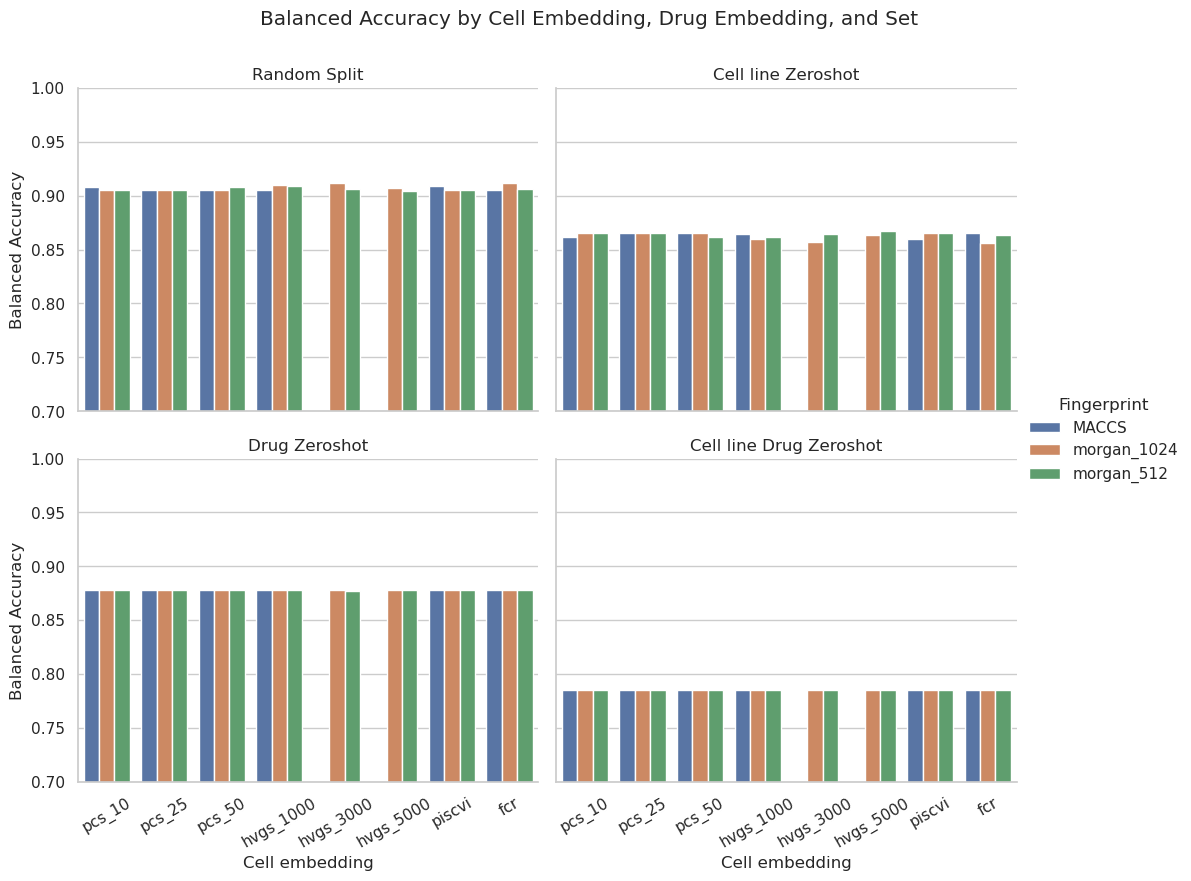

In [9]:
# Balanced Accuracy Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

embedding_order = [
    "pcs_10",
    "pcs_25",
    "pcs_50",
    "hvgs_1000",
    "hvgs_3000",
    "hvgs_5000",
    "piscvi",
    "fcr"
]

g = sns.catplot(
    data=df,
    kind="bar",
    x="Embedding",
    y="Balanced_Accuracy",
    hue="Fingerprint",
    col="Set",
    col_wrap=2,
    height=4,
    aspect=1.3,
    ci=None,
    order=embedding_order
)

g.set_axis_labels("Cell embedding", "Balanced Accuracy")
g.set_titles("{col_name}")
g.set(ylim=(0.7, 1.0))
g.fig.suptitle("Balanced Accuracy by Cell Embedding, Drug Embedding, and Set", y=1.05)
for ax in g.axes.flat:
    # plt.xticks(rotation=30)
    ax.tick_params(axis="x", labelrotation=30)

plot_name = "Bal_Acc_Histogram.jpg"
g.fig.savefig(os.path.join(base_dir, plot_name), dpi=300, bbox_inches="tight")
plt.show()
plt.close(g.fig)

/scratch/tmp.52252746.rquiles/ipykernel_194669/1737653807.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


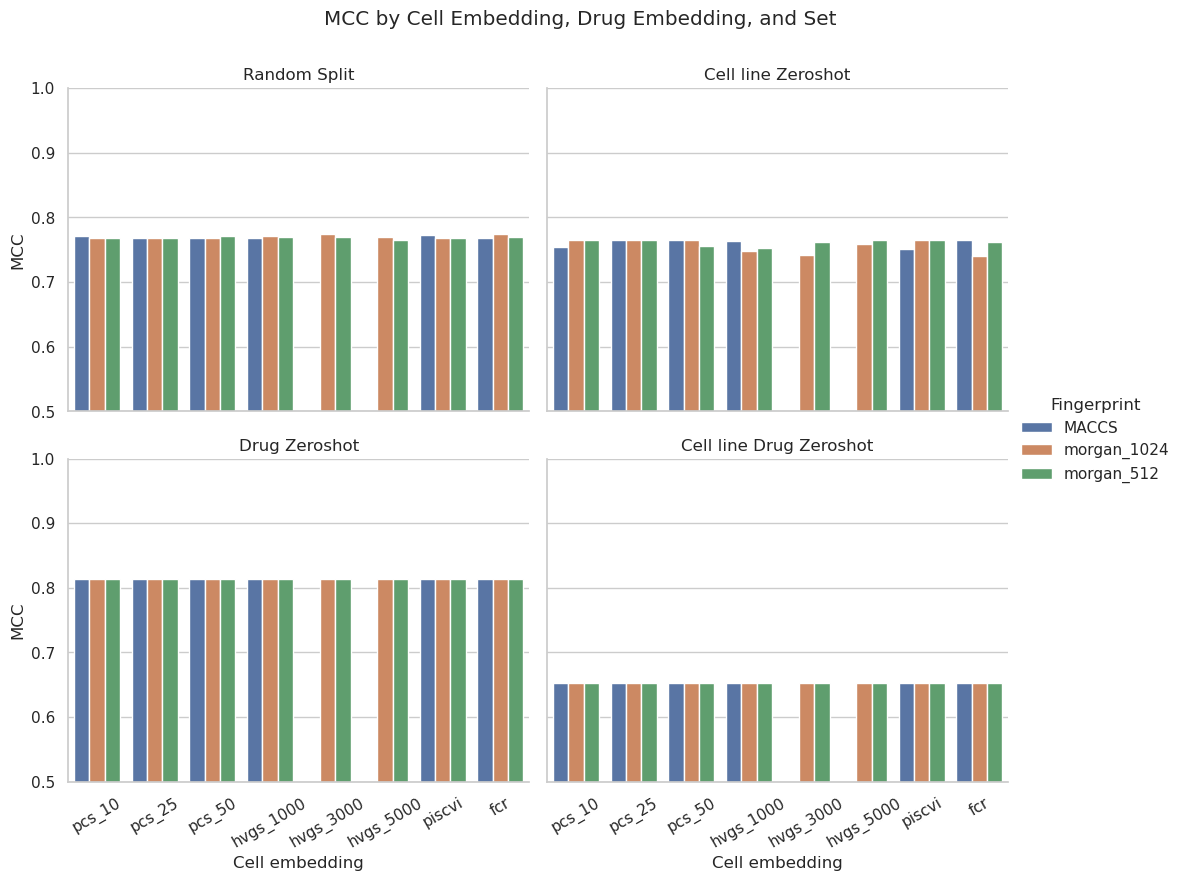

In [10]:
# MCC Barplot
g = sns.catplot(
    data=df,
    kind="bar",
    x="Embedding",
    y="MCC",
    hue="Fingerprint",
    col="Set",
    col_wrap=2,
    height=4,
    aspect=1.3,
    ci=None,
    order=embedding_order
)

g.set_axis_labels("Cell embedding", "MCC")
g.set_titles("{col_name}")
g.set(ylim=(0.5, 1.0))
g.fig.suptitle("MCC by Cell Embedding, Drug Embedding, and Set", y=1.05)
for ax in g.axes.flat:
    # plt.xticks(rotation=30)
    ax.tick_params(axis="x", labelrotation=30)

plot_name = "MCC_Histogram.jpg"
g.fig.savefig(os.path.join(base_dir, plot_name), dpi=300, bbox_inches="tight")
plt.show()
plt.close(g.fig)